## The following code will walk through doing some analysis of the wine dataset from sklearn.
_____________________________________________________________________________________________________________________

<font color=blue>After importing various libraries that are needed, the wine dataset is loaded into a panda dataframe. The targets from the dataset are classes of wine - classes 0, 1, 2.

The classes are added to the dataframe for ease of grouping the data.</font>


In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine


# Load wine dataset from sklearn and load into to a panda dataframe
wine = load_wine()
df = pd.DataFrame(wine.data, columns= wine.feature_names)
targets = wine.target #these are the classes of each sample
df['wclass'] = targets
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wclass
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<font color=blue>The head of the dataframe illustrates that there are 13 attributes/variables. The wine class has been added to the end of the frame.

The mean value of each variable by class is illustrated below.</font>

In [20]:
summary = df.groupby('wclass').mean().reset_index()
summary

,wclass,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


<font color=blue>The summary above reveals that there are some variables that illustrate a fair amount of difference between the classes.

We'll take a look at the mean values of total_phenols, flavanoids and nonflavoid_phenols.</font>

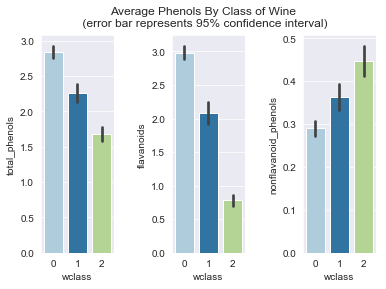

In [21]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='wclass', y='total_phenols')
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='wclass', y='flavanoids')
plt.subplot(1, 3, 3);
sns.barplot(data=df, x='wclass', y='nonflavanoid_phenols')
plt.subplots_adjust(wspace=0.8)
plt.suptitle('Average Phenols By Class of Wine\n (error bar represents 95% confidence interval)')
plt.draw()

<font color=blue>In the plot above you can see the same relationship across the classes for total_phenols and flavanoids. Flavanoids are a type of phenol, thus it appears that flavanoids make up the total or bulk of the phenolic content for classes 0 and 1. Non-flavanoid phenols make up the bulk of the total phenols for class 3.

Given that up to 90% of a red wine's phenolic content is made up of flavanoids, I would guess that the class 0 and class 1 wines are red. Class 2 is likely white wine.

The mean color_intensity of each class also appears to reveal some differences. The plot below uses the Seaborn kde plot to illustrate the differences in the color_intensity distributions between the classes.</font>

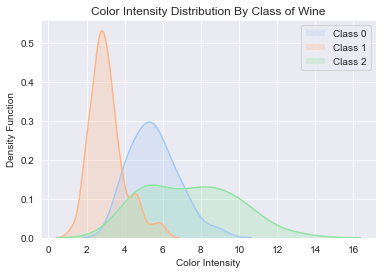

In [22]:
class0_color_intensity = df.apply(lambda row: row.color_intensity if row.wclass == 0 else None, axis=1)
class1_color_intensity = df.apply(lambda row: row.color_intensity if row.wclass == 1 else None, axis=1)
class2_color_intensity = df.apply(lambda row: row.color_intensity if row.wclass == 2 else None, axis=1)

sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.kdeplot(data=class0_color_intensity, shade=True)
sns.kdeplot(data=class1_color_intensity, shade=True)
sns.kdeplot(data=class2_color_intensity, shade=True)
plt.title('Color Intensity Distribution By Class of Wine')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Color Intensity')
plt.ylabel('Density Function')
plt.show()


<font color=blue>There is clearly a distinction between the color_intensity distributions of each class. 

 - Class 0 appears to have a relatively normal distribution. 
 - Class 1 has little dispersion and is skewed slightly right from the low end of the spectrum.
 - Class 2 is bimodal and spans nearly across the entire spectrum

Considering that hue may have a clear relationship with color_intensity, a scatterplot of the two variables may be useful to reveal any relationship - see below.</font>

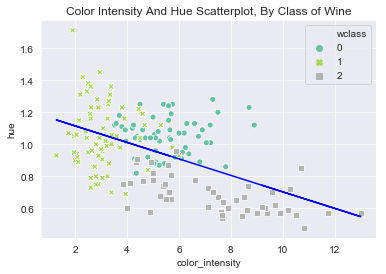

In [23]:
sns.scatterplot(x='color_intensity', y='hue', hue='wclass', style='wclass', palette='Set2', data=df)

color_intensity = df.color_intensity.values
color_intensity = color_intensity.reshape(-1,1)
w_hue = df.hue.values
w_hue = w_hue.reshape(-1,1)

fitter = LinearRegression()
fitter.fit(color_intensity, w_hue)
hue_predict = fitter.predict(color_intensity)

plt.plot(color_intensity, hue_predict, color='blue')
plt.title('Color Intensity And Hue Scatterplot, By Class of Wine')
plt.show()

<font color=blue>Indeed the scatterplot illustrates that a higher color_intensity is indicative of a lower hue. The regression line added to the plot makes the relationship clear.

Each class is represented by a specific marker, illustrating what was observed by the kde plots. The color_intensity of class 2 is shown again as being well dispersed across the spectrum, and the hue is mostly low. This provides further evidence that class 2 is white wine.

A k-means clustering predictive model could perhaps be made from just the color_intensity and hue attributes. Though, darker rosés and aged whites could prove problematic!</font>